In [1]:
%matplotlib inline
import os
import numpy as np
import matplotlib as mpl
import pickle

import readdy_learn.analyze.analyze as ana
import readdy_learn.analyze.basis as basis
from pathos.multiprocessing import Pool

import pynumtools.kmc as kmc

mpl.rcParams['figure.figsize'] = (13, 13)
import matplotlib.pyplot as plt
import scipy.signal as ss
from readdy_learn.example.regulation_network import RegulationNetwork
from readdy_learn.example.regulation_network import sample_lsq_rates

/srv/public/clonker/miniconda3/envs/readdy_learn/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [13]:
def mean_confidence_interval(data, confidence=0.95):
    from scipy.stats import t
    from scipy.stats import sem
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), sem(a)
    h = se * t.ppf((1+confidence)/2., n-1)
    return m, m-h, m+h
def plot_l2_error(result):
    keys = np.array(sorted([k for k in result.keys()]))

    l2_mean = []
    l2_std = []
    l2_lconf = []
    l2_rconf = []
    for k in keys:
        l2_err = result[k]['l2_err']
        mean, lconf, rconf = mean_confidence_interval(l2_err)
        l2_errs = np.array(l2_err)
        #l2_mean.append(np.mean(l2_errs))
        #l2_std.append(np.std(l2_errs))
        l2_mean.append(mean)
        l2_lconf.append(lconf)
        l2_rconf.append(rconf)
    l2_mean = np.array(l2_mean)
    #l2_std = np.array(l2_std)
    l2_lconf = np.array(l2_lconf)
    l2_rconf = np.array(l2_rconf)

    plt.fill_between(keys, l2_lconf, l2_rconf,
                     color='b', alpha=.5)
    #plt.errorbar(keys, l2_mean, yerr=l2_std)
    plt.plot(keys, l2_mean)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('N')
    plt.ylabel('L2 error')
    #print(l2_mean[-1], l2_std[-1])

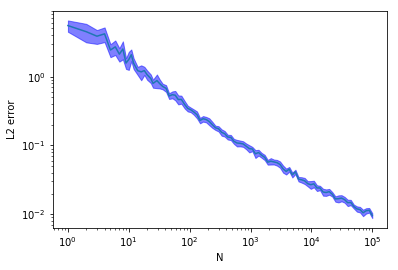

In [14]:
keys = np.array(sorted([k for k in result.keys()]))
plot_l2_error(result)

In [4]:
# files
resultfile = 'point_1.p'
resultfile_56 = 'results56.pickle'
resultfile_6_11 = 'results_6_11.pickle'
resultfile_11_12 = 'results11_12.pickle'

In [5]:
if os.path.exists(resultfile):
    with open(resultfile, 'rb') as f:
        result = pickle.load(f)
else:
    result = None

In [59]:
results_0_5 = result

In [60]:
if result is None:
    realizations = np.logspace(0, 5, num=100, dtype=int)
    result = sample_lsq_rates(realizations, samples_per_variance=30, timestep=2e-3)
    with open(resultfile, 'wb') as f:
        pickle.dump(result, f)

0.009570074582431242 0.0020767955668624656


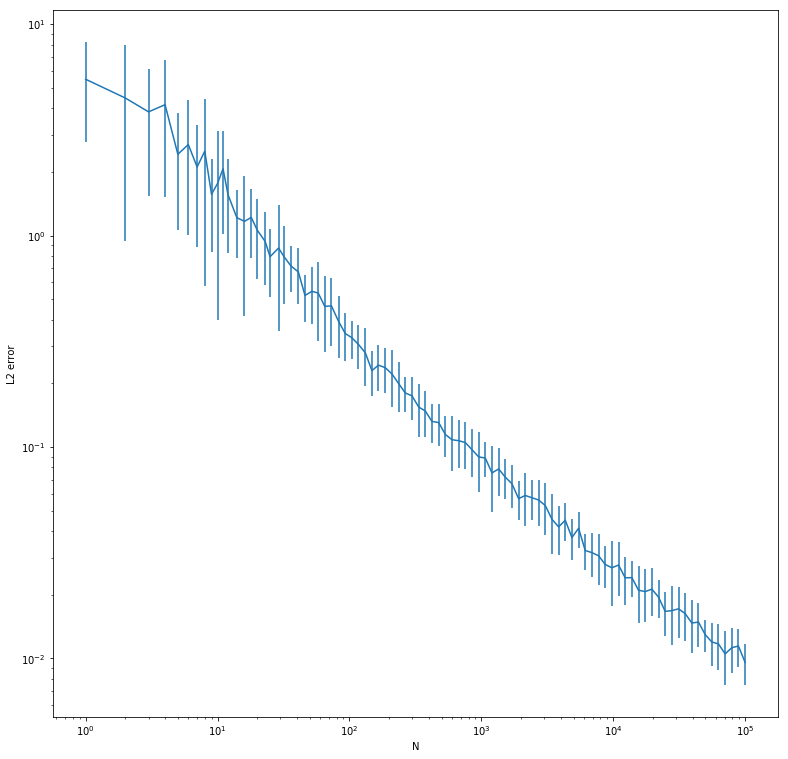

In [61]:
keys = np.array(sorted([k for k in result.keys()]))
plot_l2_error(result)

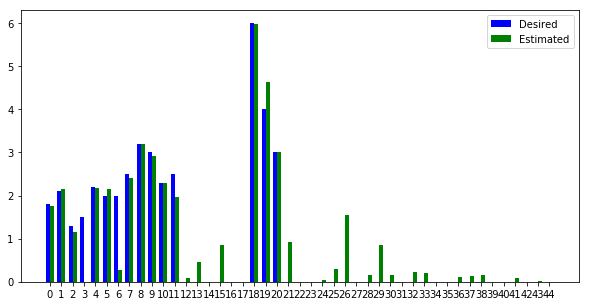

In [19]:
regulation_network = RegulationNetwork()
regulation_network.timestep = 6e-3
regulation_network.realisations = 1.
regulation_network.noise_variance = .1 / (10*keys[-1])
regulation_network.initial_states = [regulation_network.initial_states[1]]
ana.plot_rates_bar(regulation_network.desired_rates, result[keys[-1]]['lsq_rates'][0])

In [63]:
meanrates = np.mean(np.array(result[keys[-1]]['lsq_rates']), axis=0)
stdrates = np.std(np.array(result[keys[-1]]['lsq_rates']), axis=0)

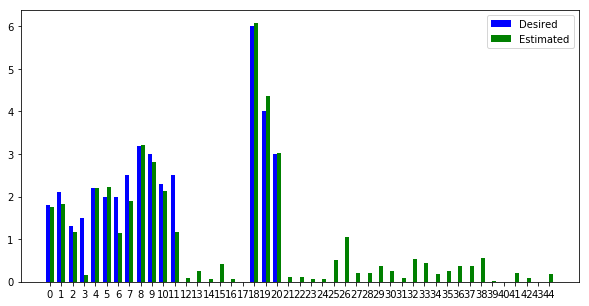

In [64]:
ana.plot_rates_bar(regulation_network.desired_rates, meanrates)
# analysis.plot_results(0, meanrates)

In [65]:
with open('results.pickle', 'wb') as f:
    pickle.dump(result, f)

# between $10^5$ and $10^6$

In [66]:
if os.path.exists(resultfile_56):
    with open(resultfile_56, 'rb') as f:
        results_56 = pickle.load(f)
else:
    results_56 = None

In [67]:
results_5_6 = results_56

In [68]:
if results_56 is None:
    results_56 = sample_lsq_rates(np.logspace(5, 6, num=10, dtype=int), samples_per_variance=10, timestep=2e-3)
    with open(resultfile_56, 'wb') as f:
        pickle.dump(results_56, f)

0.0027387313580138246 0.0011453458860243592


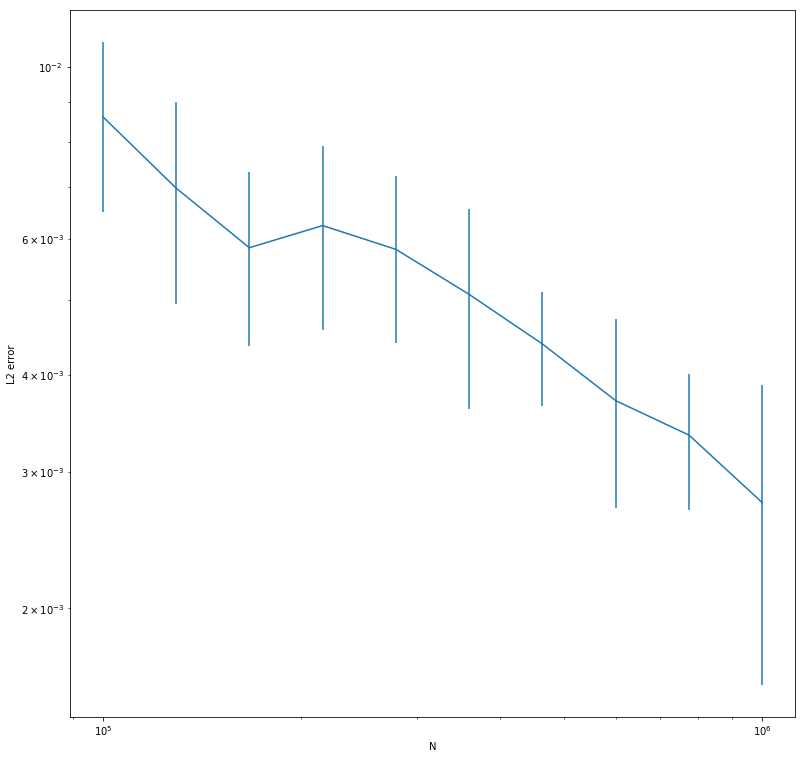

In [69]:
keys = np.array(sorted([k for k in results_56.keys()]))
plot_l2_error(results_56)

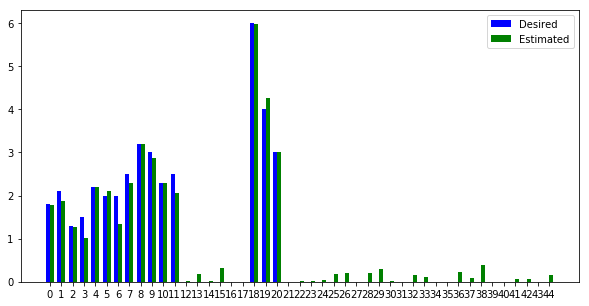

In [70]:
rates56 = results_56[keys[-1]]['lsq_rates'][6]
ana.plot_rates_bar(regulation_network.desired_rates, rates56)

# between $10^{11}$ and $10^{12}$

In [71]:
if os.path.exists(resultfile_11_12):
    with open(resultfile_11_12, 'rb') as f:
        results_11_12 = pickle.load(f)
else:
    results_11_12 = None

In [72]:
if results_11_12 is None:
    results_11_12 = sample_lsq_rates(np.logspace(11, 12, num=10, dtype=int), 
                                     samples_per_variance=10, timestep=2e-3)
    with open(resultfile_11_12, 'wb') as f:
        pickle.dump(results_11_12, f)

0.0006392155284320866 1.6599346830639075e-06


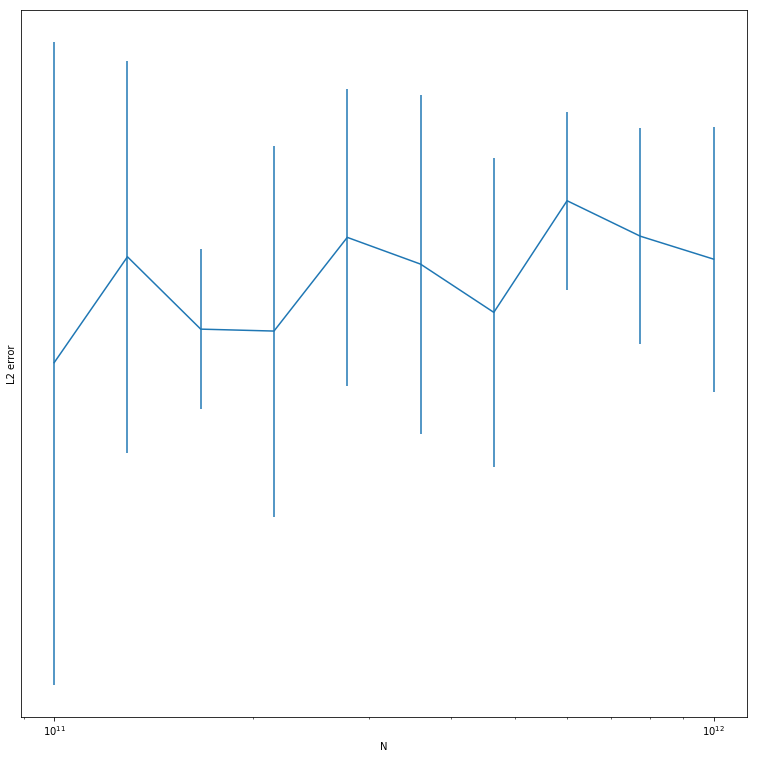

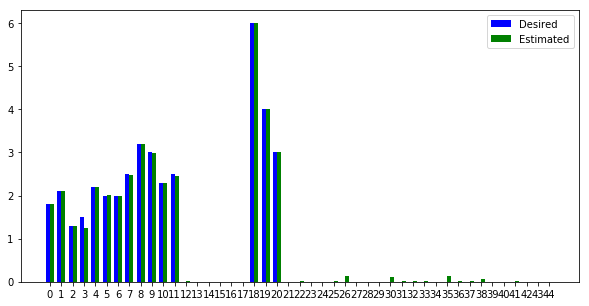

In [73]:
keys = np.array(sorted([k for k in results_11_12.keys()]))
plot_l2_error(results_11_12)
rates_11_12 = results_11_12[keys[-1]]['lsq_rates'][6]
ana.plot_rates_bar(regulation_network.desired_rates, rates_11_12)

# between $10^6$ and $10^{11}$

In [74]:
if os.path.exists(resultfile_6_11):
    with open(resultfile_6_11, 'rb') as f:
        results_6_11 = pickle.load(f)
else:
    results_6_11 = None

In [75]:
if results_6_11 is None:
    results_6_11 = sample_lsq_rates(np.logspace(6, 11, num=100, dtype=int), 
                                     samples_per_variance=30, timestep=2e-3)
    with open(resultfile_6_11, 'wb') as f:
        pickle.dump(results_6_11, f)

0.0006396023343044617 3.589671752430237e-06


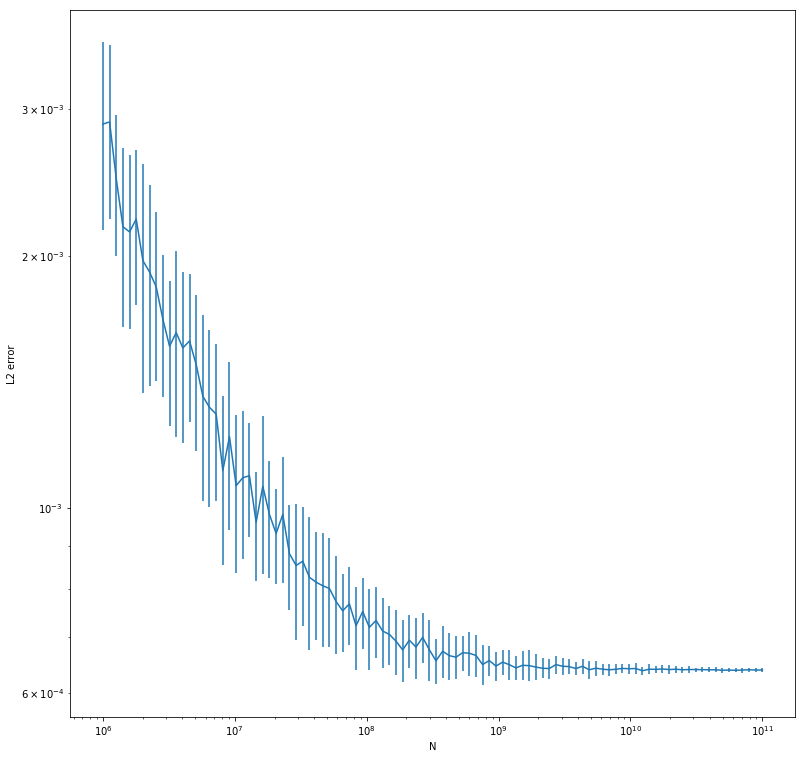

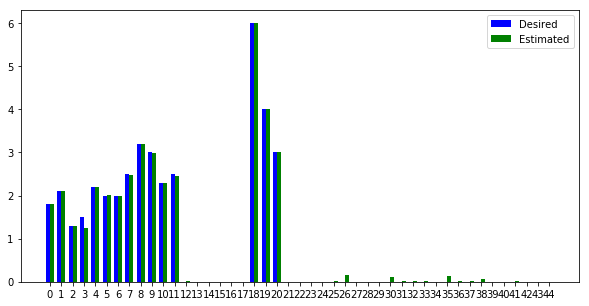

In [76]:
keys = np.array(sorted([k for k in results_6_11.keys()]))
plot_l2_error(results_6_11)
ana.plot_rates_bar(regulation_network.desired_rates, results_6_11[keys[-1]]['lsq_rates'][6])

In [77]:
l1_errors = []
for key in keys:
    meanrates = np.mean(np.array(results_6_11[key]['lsq_rates']), axis=0)
    l1_errors.append(np.sum(np.abs(meanrates - regulation_network.desired_rates)))

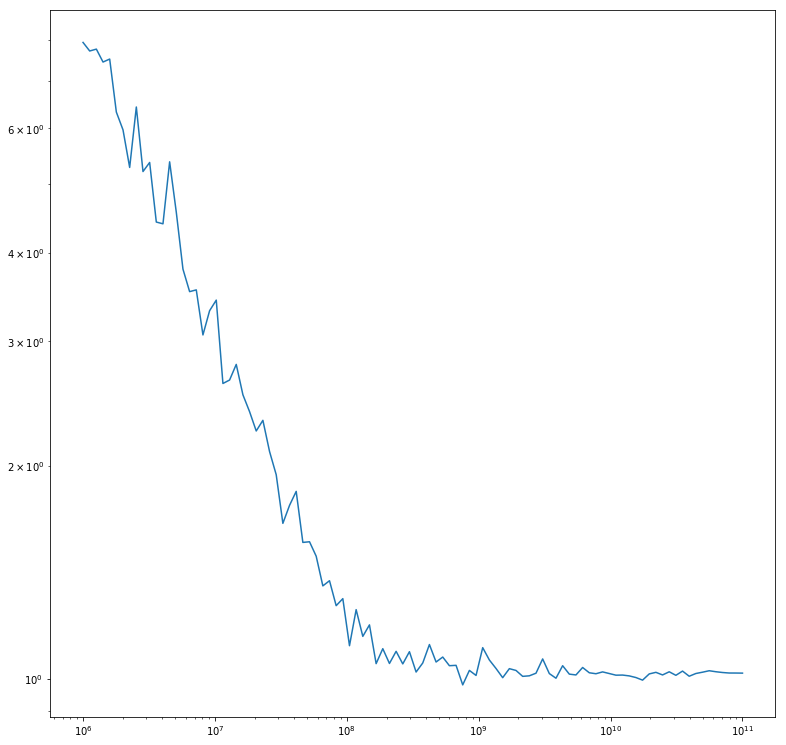

In [79]:
plt.plot(keys, l1_errors)
plt.xscale('log')
plt.yscale('log')

# composite

In [81]:
all_results = {**results_0_5, **results_5_6, **results_6_11, **results_11_12}

In [16]:
if os.path.exists('results.pickle'):
    with open('results.pickle', "rb") as f:
        all_results = pickle.load(f)

In [83]:
with open('results.pickle', 'wb') as f:
    pickle.dump(all_results, f)

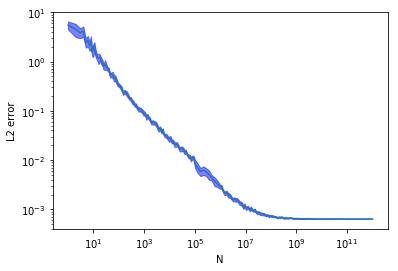

In [17]:
plot_l2_error(all_results)

In [20]:
l1_errors = []
l1_std = []
for key in all_results.keys():
    meanrates = np.mean(np.array(all_results[key]['lsq_rates']), axis=0)
    stdrates = np.std(np.array(all_results[key]['lsq_rates']), axis=0)
    l1_errors.append(np.sum(np.abs(meanrates - regulation_network.desired_rates)))
    l1_std.append(np.max(stdrates))

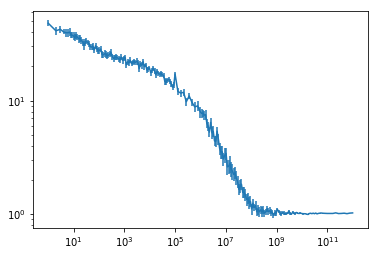

In [21]:
plt.errorbar(all_results.keys(), l1_errors, yerr=l1_std)
plt.xscale('log')
plt.yscale('log')

# smooth

In [37]:
regulation_network = RegulationNetwork()
regulation_network.timestep = 2e-3
regulation_network.realisations = 1.
regulation_network.noise_variance = 0.
regulation_network.initial_states = [regulation_network.initial_states[1]]
analysis = regulation_network.generate_analysis_object()
for i in range(len(regulation_network.initial_states)):
    analysis.generate_or_load_traj_lma(i, regulation_network.target_time,
                                       noise_variance=regulation_network.noise_variance,
                                       realizations=regulation_network.realisations)
regulation_network.compute_gradient_derivatives(analysis, persist=False)
print("traj 1 counts shape: {}".format(analysis.get_traj(0).counts.shape))

traj 1 counts shape: (1500, 9)


In [38]:
lsq = analysis.least_squares([0], tol=1e-16, recompute=True, persist=False, verbose=True)

optimization problem did exit successfully (alpha=0.0, lambda=1.0)!
status 0: Optimization terminated successfully.
388 / 30000 iterations


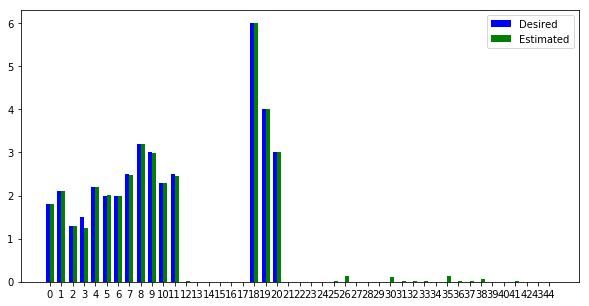

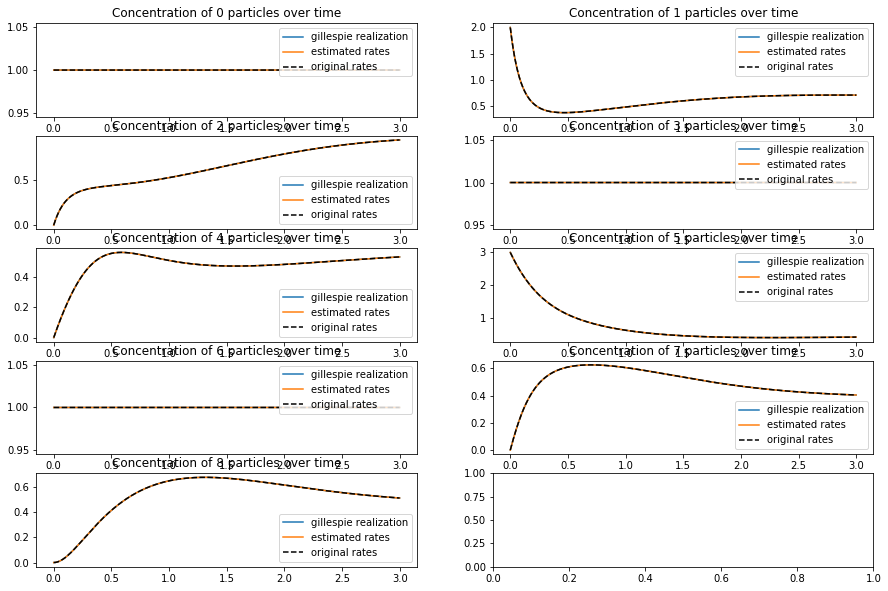

In [39]:
ana.plot_rates_bar(regulation_network.desired_rates, lsq)
analysis.plot_results(0, lsq)

In [40]:
# 1e-22
analysis.compute_L2_error(0, lsq)

0.0006398903540712674

# the normal distribution does indeed scale with $\sigma^2/N \sim N$ realizations

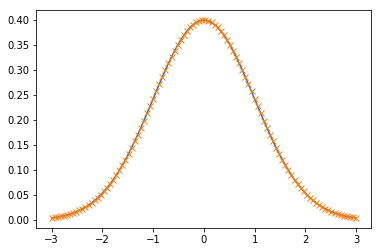

In [52]:
import math 
import matplotlib.mlab as mlab

mu = 0
variance = 1.
sigma1 = math.sqrt(variance/3.)
sigma2 = math.sqrt(variance)

x = np.linspace(mu - 3*sigma2, mu + 3*sigma2, 100)
y = mlab.normpdf(x, mu, sigma2)

x2 = np.linspace(mu - 3*sigma2, mu + 3*sigma2, 100)
y2 = mlab.normpdf(x2, mu, sigma)
y3 = mlab.normpdf(x2, mu, sigma)
y4 = mlab.normpdf(x2, mu, sigma)
y5 = (y3 + y2+y4) / 3.

plt.plot(x,y)
plt.plot(x2, y5, 'x')
plt.show()